In [1]:
import numpy as np
def compute_ssim_batch(generated, real):
    """
    generated: torch.Tensor of shape [B, 1, H, W]
    real: torch.Tensor of shape [B, 1, H, W]
    Returns the average SSIM over the batch
    """
    generated_np = generated.squeeze(1).cpu().numpy()  # [B, H, W]
    real_np = real.squeeze(1).cpu().numpy()            # [B, H, W]
    
    ssim_scores = []
    for g, r in zip(generated_np, real_np):
        score = ssim(g, r, data_range=1.0)  # Assuming images are normalized [0, 1]
        ssim_scores.append(score)
    
    return np.mean(ssim_scores)

c:\Users\ilasy\btechproject\galaxy_gen\galaxy_gen\sampler.py:218: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = TensorDataset(torch.tensor(data))


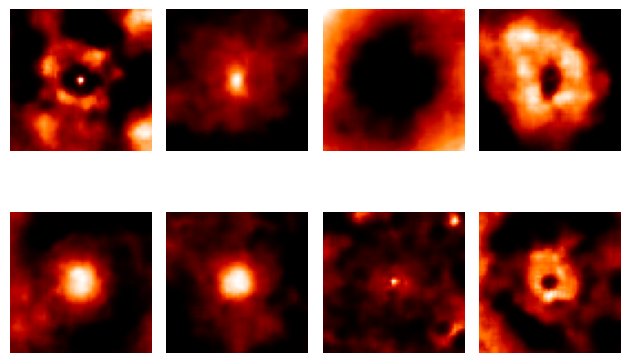

In [2]:
# example_usage.py
import torch
import matplotlib.pyplot as plt
from galaxy_gen.sampler import load_model, generate_formationtime_samples
import os
import galaxy_gen
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as psnr
from lpips import LPIPS
from skimage.metrics import structural_similarity as ssim

# Path to your saved model checkpoint.
model_path = os.path.join(os.path.dirname(galaxy_gen.__file__), 'models/formationtime_model.pth')
device = 'cpu'  # or 'cuda' if you have a GPU

# Load the model.
model = load_model("formation_time",model_path, device=device)

# Generate random samples.
samples, _ = generate_formationtime_samples(model, batch_size=64)

fig, axes = plt.subplots(2, 4)
for i, ax in enumerate(axes.flat):
    ax.imshow(samples[i].permute(1, 2, 0), cmap="gist_heat", aspect="equal")  # Change (C, H, W) → (H, W, C)
    ax.axis("off")  # Hide axes
    ax.set_aspect('equal')  # Set aspect ratio to equal
    if i>7:
          # Adjust aspect ratio to reduce distance between rows
        break
plt.tight_layout()
plt.show()

c:\Users\ilasy\btechproject\galaxy_gen\galaxy_gen\sampler.py:180: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = TensorDataset(torch.tensor(data))


Generated samples shape: torch.Size([64, 1, 64, 64])
Batch shape: torch.Size([64, 1, 64, 64])
Mean Squared Error (MSE) between generated samples and batch: 0.0006458554303886002
Peak Signal-to-Noise Ratio (PSNR) between generated samples and batch: 31.728678344649484
Structural Similarity Index (SSIM) between generated samples and batch: 0.870600888031886
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


C:\Users\ilasy\AppData\Roaming\Python\Python313\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ilasy\AppData\Roaming\Python\Python313\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: C:\Users\ilasy\AppData\Roaming\Python\Python313\site-packages\lpips\weights\v0.1\alex.pth
Learned Perceptual Image Patch Similarity (LPIPS) between generated samples and batch: 0.11179575324058533


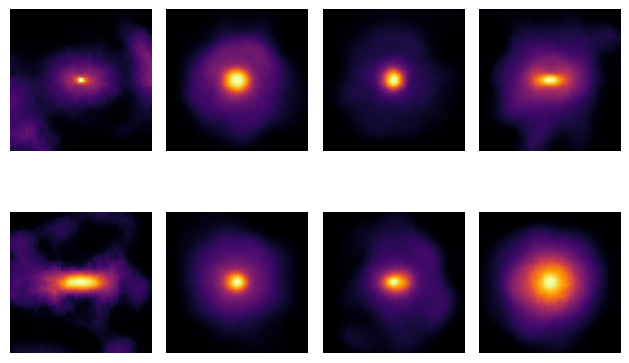

In [15]:
# example_usage.py
import torch
import matplotlib.pyplot as plt
from galaxy_gen.sampler import load_model, generate_metallicity_samples
import os
import galaxy_gen
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as psnr
from lpips import LPIPS
from skimage.metrics import structural_similarity as ssim

# Path to your saved model checkpoint.
model_path = os.path.join(os.path.dirname(galaxy_gen.__file__), 'models/metallicity_model.pth')
device = 'cpu'  # or 'cuda' if you have a GPU

# Load the model.
model = load_model("metallicity",model_path, device=device)

# Generate random samples.
samples, batch = generate_metallicity_samples(model, batch_size=64)
print(f"Generated samples shape: {samples.shape}")
print(f"Batch shape: {batch.shape}")
# Compare the samples and the batch to calculate generation metrics

# Assuming samples and batch are numpy arrays of the same shape
mse = mean_squared_error(batch.flatten(), samples.flatten())
print(f"Mean Squared Error (MSE) between generated samples and batch: {mse}")
# Calculate PSNR between generated samples and batch
psnr_value = psnr(batch.cpu().numpy(), samples.cpu().numpy(), data_range=samples.max().item() - samples.min().item())
print(f"Peak Signal-to-Noise Ratio (PSNR) between generated samples and batch: {psnr_value}")

# Set win_size to an odd value less than or equal to the smaller side of the images
ssim_value = compute_ssim_batch(samples, batch)
print(f"Structural Similarity Index (SSIM) between generated samples and batch: {ssim_value}")

# Initialize the LPIPS metric
lpips_metric = LPIPS(net='alex')  # You can also use 'vgg' as the network

# Convert samples and batch to tensors with appropriate shape and range
samples_tensor = samples# (N, C, H, W)
batch_tensor = batch  # Ensure batch_tensor is also (N, C, H, W)

# Calculate LPIPS
lpips_value = lpips_metric(samples_tensor, batch_tensor).mean().item()
print(f"Learned Perceptual Image Patch Similarity (LPIPS) between generated samples and batch: {lpips_value}")


fig, axes = plt.subplots(2, 4)
for i, ax in enumerate(axes.flat):
    ax.imshow(samples[i].permute(1, 2, 0), cmap = "inferno")  # Change (C, H, W) → (H, W, C)
    ax.axis("off")  # Hide axes
    if i>7:
        break
plt.tight_layout()
plt.show()

torch.Size([100, 1, 64, 64])


c:\Users\ilasy\btechproject\galaxy_gen\galaxy_gen\sampler.py:258: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = TensorDataset(torch.tensor(data))


Generated samples shape: torch.Size([64, 1, 64, 64])
Batch shape: torch.Size([64, 1, 64, 64])
Mean Squared Error (MSE) between generated samples and batch: 0.0006224748476527413
Peak Signal-to-Noise Ratio (PSNR) between generated samples and batch: 31.978056351272098
Structural Similarity Index (SSIM) between generated samples and batch: 0.9298189850407965
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


C:\Users\ilasy\AppData\Roaming\Python\Python313\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ilasy\AppData\Roaming\Python\Python313\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: C:\Users\ilasy\AppData\Roaming\Python\Python313\site-packages\lpips\weights\v0.1\alex.pth
Learned Perceptual Image Patch Similarity (LPIPS) between generated samples and batch: 0.036869511008262634


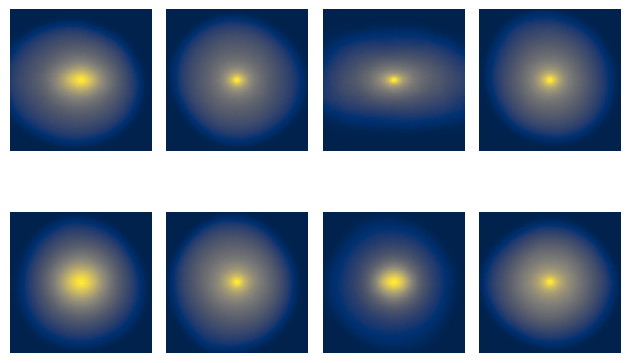

In [14]:
# example_usage.py
import torch
import matplotlib.pyplot as plt
from galaxy_gen.sampler import load_model, generate_masses_samples
import os
import galaxy_gen
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as psnr
from lpips import LPIPS
from skimage.metrics import structural_similarity as ssim

# Path to your saved model checkpoint.
model_path = os.path.join(os.path.dirname(galaxy_gen.__file__), 'models/mass_model.pth')
device = 'cpu'  # or 'cuda' if you have a GPU

# Load the model.
model = load_model("masses",model_path, device=device)

# Generate random samples.
samples, batch = generate_masses_samples(model, batch_size=64)
print(f"Generated samples shape: {samples.shape}")
print(f"Batch shape: {batch.shape}")
# Compare the samples and the batch to calculate generation metrics

# Assuming samples and batch are numpy arrays of the same shape
mse = mean_squared_error(batch.flatten(), samples.flatten())
print(f"Mean Squared Error (MSE) between generated samples and batch: {mse}")
# Calculate PSNR between generated samples and batch
psnr_value = psnr(batch.cpu().numpy(), samples.cpu().numpy(), data_range=samples.max().item() - samples.min().item())
print(f"Peak Signal-to-Noise Ratio (PSNR) between generated samples and batch: {psnr_value}")

# Set win_size to an odd value less than or equal to the smaller side of the images
ssim_value = compute_ssim_batch(samples, batch)
print(f"Structural Similarity Index (SSIM) between generated samples and batch: {ssim_value}")

# Initialize the LPIPS metric
lpips_metric = LPIPS(net='alex')  # You can also use 'vgg' as the network

# Convert samples and batch to tensors with appropriate shape and range
samples_tensor = samples# (N, C, H, W)
batch_tensor = batch  # Ensure batch_tensor is also (N, C, H, W)

# Calculate LPIPS
lpips_value = lpips_metric(samples_tensor, batch_tensor).mean().item()
print(f"Learned Perceptual Image Patch Similarity (LPIPS) between generated samples and batch: {lpips_value}")


fig, axes = plt.subplots(2, 4)
for i, ax in enumerate(axes.flat):
    ax.imshow(samples[i].permute(1, 2, 0), cmap="cividis")  # Change (C, H, W) → (H, W, C)
    ax.axis("off")  # Hide axes
    if i>7:
        break
plt.tight_layout()
plt.show()

In [16]:
def compute_ssim_rgb_batch(generated, real):
    """
    generated: torch.Tensor of shape [B, 3, H, W]
    real: torch.Tensor of shape [B, 3, H, W]
    Returns the average SSIM over the batch
    """
    # Move tensors to CPU and convert to numpy arrays in [B, H, W, C] format
    generated_np = generated.permute(0, 2, 3, 1).cpu().numpy()  # [B, H, W, C]
    real_np = real.permute(0, 2, 3, 1).cpu().numpy()            # [B, H, W, C]

    ssim_scores = []
    for g, r in zip(generated_np, real_np):
        score = ssim(g, r, data_range=1.0, channel_axis=-1)
        ssim_scores.append(score)

    return np.mean(ssim_scores)

Generated samples shape: torch.Size([64, 3, 64, 64])
Batch shape: torch.Size([64, 3, 64, 64])
Mean Squared Error (MSE) between generated samples and batch: 0.03215478073488718
Peak Signal-to-Noise Ratio (PSNR) between generated samples and batch: 14.878797199169629
Structural Similarity Index (SSIM) between generated samples and batch: 0.37552404403686523
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


C:\Users\ilasy\AppData\Roaming\Python\Python313\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ilasy\AppData\Roaming\Python\Python313\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: C:\Users\ilasy\AppData\Roaming\Python\Python313\site-packages\lpips\weights\v0.1\alex.pth
Learned Perceptual Image Patch Similarity (LPIPS) between generated samples and batch: 0.2825205624103546


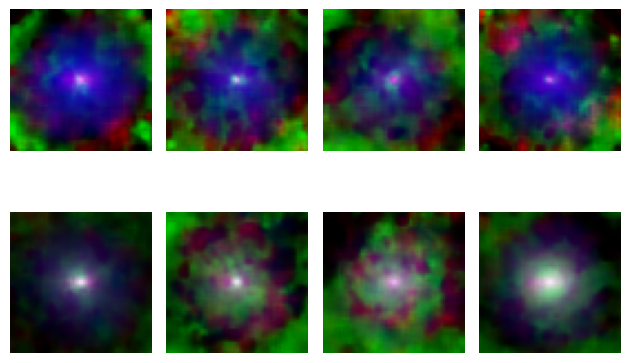

In [19]:
# example_usage.py
import torch
import matplotlib.pyplot as plt
from galaxy_gen.sampler import load_model, generate_galaxy_samples
import os
import galaxy_gen
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as psnr
from lpips import LPIPS
from skimage.metrics import structural_similarity as ssim

# Path to your saved model checkpoint.
model_path = os.path.join(os.path.dirname(galaxy_gen.__file__), 'models/galaxy_model.pth')
device = 'cpu'  # or 'cuda' if you have a GPU

# Load the model.
model = load_model("galaxy",model_path, device=device)

# Generate random samples.
samples, batch = generate_galaxy_samples(model, batch_size=64)
samples = torch.tensor(samples)
print(f"Generated samples shape: {samples.shape}")
print(f"Batch shape: {batch.shape}")
# Compare the samples and the batch to calculate generation metrics

# Assuming samples and batch are numpy arrays of the same shape
mse = mean_squared_error(batch.flatten(), samples.flatten())
print(f"Mean Squared Error (MSE) between generated samples and batch: {mse}")
# Calculate PSNR between generated samples and batch
psnr_value = psnr(batch.cpu().numpy(), samples.cpu().numpy(), data_range=samples.max().item() - samples.min().item())
print(f"Peak Signal-to-Noise Ratio (PSNR) between generated samples and batch: {psnr_value}")

# Set win_size to an odd value less than or equal to the smaller side of the images
ssim_value = compute_ssim_rgb_batch(samples, batch)
print(f"Structural Similarity Index (SSIM) between generated samples and batch: {ssim_value}")

# Initialize the LPIPS metric
lpips_metric = LPIPS(net='alex')  # You can also use 'vgg' as the network

# Convert samples and batch to tensors with appropriate shape and range
samples_tensor = samples# (N, C, H, W)
batch_tensor = batch  # Ensure batch_tensor is also (N, C, H, W)

# Calculate LPIPS
lpips_value = lpips_metric(samples_tensor, batch_tensor).mean().item()
print(f"Learned Perceptual Image Patch Similarity (LPIPS) between generated samples and batch: {lpips_value}")


fig, axes = plt.subplots(2, 4)
for i, ax in enumerate(axes.flat):
    ax.imshow(samples[i].permute(1, 2, 0))  # Change (C, H, W) → (H, W, C)
    ax.axis("off")  # Hide axes
    if i>7:
        break
plt.tight_layout()
plt.show()

Non-A100 GPU detected, using math or mem efficient attention if input tensor is on cuda


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

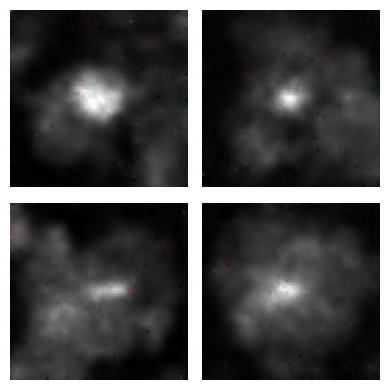

In [4]:
# example_usage.py
import torch
import matplotlib.pyplot as plt
from galaxy_gen.sampler import load_model, generate_metallicity_diffusion_samples
import os
import galaxy_gen
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as psnr
from lpips import LPIPS
from skimage.metrics import structural_similarity as ssim

# Path to your saved model checkpoint.
model_path = os.path.join(os.path.dirname(galaxy_gen.__file__), 'models/metallicity_model_diff_v3.pth')
device = 'cpu'  # or 'cuda' if you have a GPU

# Load the model.
model = load_model("metallicity_diffusion",model_path, device=device)

# Generate random samples.
samples = generate_metallicity_diffusion_samples(model)


fig, axes = plt.subplots(2, 2, figsize=(4, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(samples[i].permute(1, 2, 0), cmap="inferno")  # Change (C, H, W) → (H, W, C)
    ax.axis("off")  # Hide axes
    if i>7:
        break
plt.tight_layout()
plt.show()

Sampling...: 100%|██████████| 25/25 [00:19<00:00,  1.29it/s]


(4, 26, 1, 80, 80)


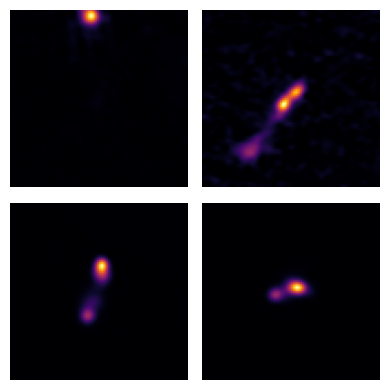

In [5]:
# example_usage.py
import torch
import matplotlib.pyplot as plt
from galaxy_gen.sampler import load_model, generate_lofar_diffusion_samples
import os
import galaxy_gen

# Path to your saved model checkpoint.
model_path = os.path.join(os.path.dirname(galaxy_gen.__file__), 'models/LOFAR_model.pt')
device = 'cpu'  # or 'cuda' if you have a GPU

# Load the model.
model = load_model("LOFAR_model",model_path, device=device)

# Generate random samples.
samples = generate_lofar_diffusion_samples(model,2)
# print(samples.shape)

fig, axes = plt.subplots(2, 2, figsize=(4, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(samples[i, -1].squeeze(), cmap = "inferno")
    # ax.set_title(f"Sampled Image {i}")
    ax.axis('off')
plt.tight_layout()
plt.show()

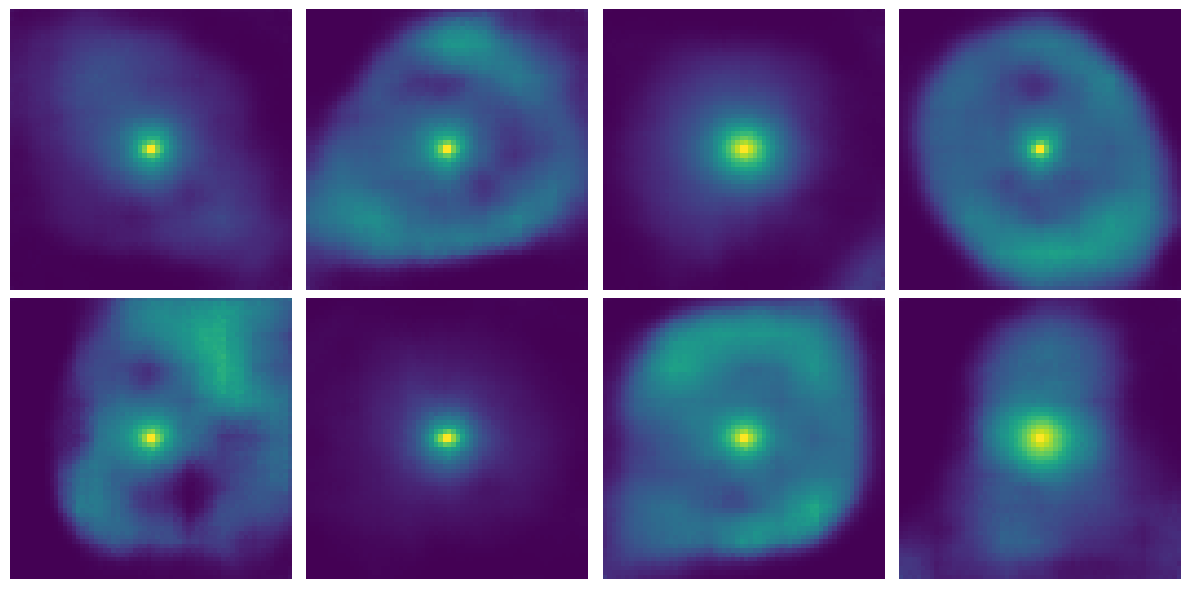

In [11]:

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(samples[i].permute(1, 2, 0))  # Change (C, H, W) → (H, W, C)
    ax.axis("off")  # Hide axes
    if i>7:
        break
plt.tight_layout()
plt.show()

torch.Size([11727, 1, 64, 64])


c:\Users\ilasy\btechproject\galaxy_gen\galaxy_gen\sampler.py:250: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = TensorDataset(torch.tensor(data))


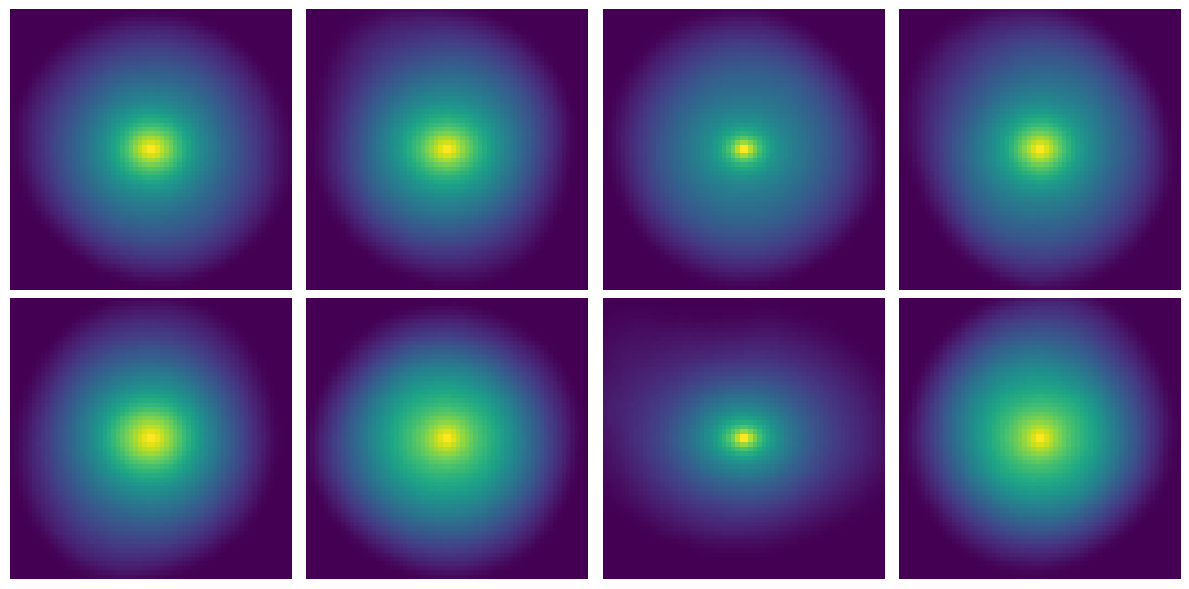

In [1]:
# example_usage.py
import torch
import matplotlib.pyplot as plt
from galaxy_gen.sampler import load_model, generate_masses_samples
import os
import galaxy_gen

# Path to your saved model checkpoint.
model_path = os.path.join(os.path.dirname(galaxy_gen.__file__), 'models/mass_model.pth')
device = 'cpu'  # or 'cuda' if you have a GPU

# Load the model.
model = load_model("masses",model_path, device=device)

# Generate random samples.
samples = generate_masses_samples(model)

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(samples[i].permute(1, 2, 0))  # Change (C, H, W) → (H, W, C)
    ax.axis("off")  # Hide axes
    if i>7:
        break
plt.tight_layout()
plt.show()